In [86]:
# Import Libraries
%matplotlib notebook
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as linregress
import scipy.stats as stats
# The path to our CSV file
file = "Resources/spotify_data.csv"

# Read our CSV file
spotify_data_df = pd.read_csv(file)
spotdf = spotify_data_df
#set graph parameters
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
spotdf.head()

,Ad-Supported MAU (mil),Ad-Supported MAU change (mil),Premium Users (mil),Premium Users change(mil),Total Monthly Active Users (mil),Total Monthly Active Users change(mil),Total Revenue (mil),Total Revenue Q. Change (mil),Year,Quarter
0,90,0,71,0,157,0,"1,149.00",0,2017,4
1,99,9,75,4,170,13,"1,139.00",-10,2018,1
2,101,2,83,8,180,10,"1,273.00",134,2018,2
3,109,8,87,4,191,11,"1,352.00",79,2018,3
4,116,7,96,9,207,16,"1,495.00",143,2018,4


In [87]:
spotdf.columns

Index(['Ad-Supported MAU (mil)', 'Ad-Supported MAU change (mil)',
       'Premium Users (mil)', 'Premium Users change(mil)',
       'Total Monthly Active Users (mil)',
       'Total Monthly Active Users change(mil)', 'Total Revenue (mil)',
       'Total Revenue Q. Change (mil)', 'Year', 'Quarter'],
      dtype='object')

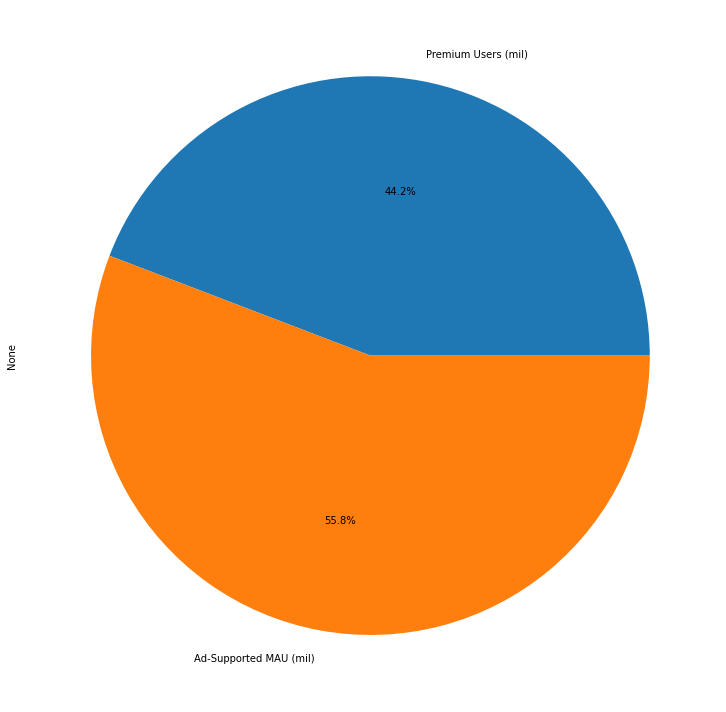

In [162]:
#Spotify Premium user vs non premium between 2018-2021 Pie graph - kayla 
prem_data = pd.DataFrame(spotdf[["Premium Users (mil)","Ad-Supported MAU (mil)"]])
prem_data.sum().plot.pie(y="Premium Users (mil)", figsize=(15, 10), autopct="%1.1f%%")
plt.figure.savefig("Figures/Users_Pie.png")

In [109]:
change_data2 = pd.DataFrame(spotdf[["Premium Users (mil)","Total Monthly Active Users (mil)", "Year", "Quarter"]])
change_data2["Percentage of Users with Premium"] = (change_data2["Premium Users (mil)"]/change_data2["Total Monthly Active Users (mil)"])*100
change_data2 = change_data2.drop(["Premium Users (mil)","Total Monthly Active Users (mil)"], axis = 1)
change_data2

,Year,Quarter,Percentage of Users with Premium
0,2017,4,45.222930
1,2018,1,44.117647
2,2018,2,46.111111
3,2018,3,45.549738
4,2018,4,46.376812
5,2019,1,46.082949
6,2019,2,46.551724
7,2019,3,45.564516
8,2019,4,45.756458
9,2020,1,45.454545


In [90]:
new_data1 = pd.DataFrame(change_data2[(change_data2["Year"] == 2018)])
new_data1 = new_data1.append(change_data2[(change_data2["Year"] == 2019)])
new_data1 = new_data1.set_index(["Year", "Quarter"])
new_data1

Percentage of Users with Premium
Year Quarter                                  
2018 1                               44.117647
     2                               46.111111
     3                               45.549738
     4                               46.376812
2019 1                               46.082949
     2                               46.551724
     3                               45.564516
     4                               45.756458

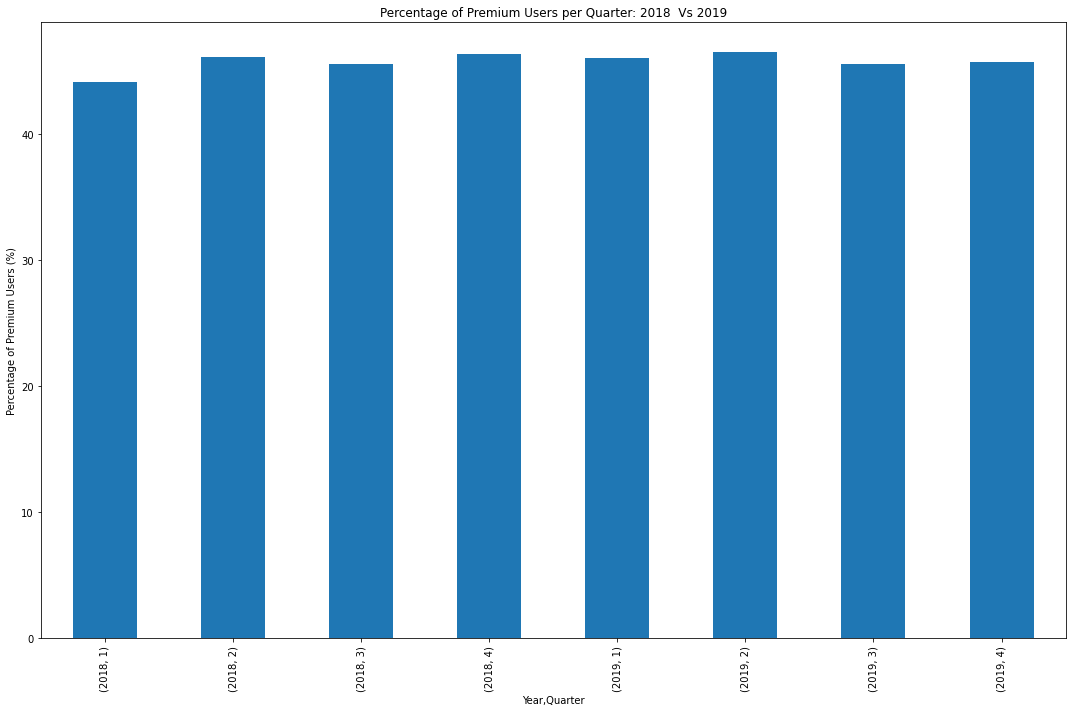

In [92]:
# % changes of 1st quarter 2018 - last quarter 2019 Bar graph - kayla
new_data1.plot.bar(title = "Percentage of Premium Users per Quarter: 2018  Vs 2019", ylabel = "Percentage of Premium Users (%)", legend = False)
plt.savefig("Figures/Premium_18.png")

In [93]:
new_data2 = pd.DataFrame(change_data2[(change_data2["Year"] == 2020)])
new_data2 = new_data2.append(change_data2[(change_data2["Year"] == 2021)])
new_data2 = new_data2.set_index(["Year", "Quarter"])
new_data2

Percentage of Users with Premium
Year Quarter                                  
2020 1                               45.454545
     2                               46.153846
     3                               45.000000
     4                               44.927536
2021 1                               44.382022
     2                               45.205479
     3                               45.144357
     4                               44.334975

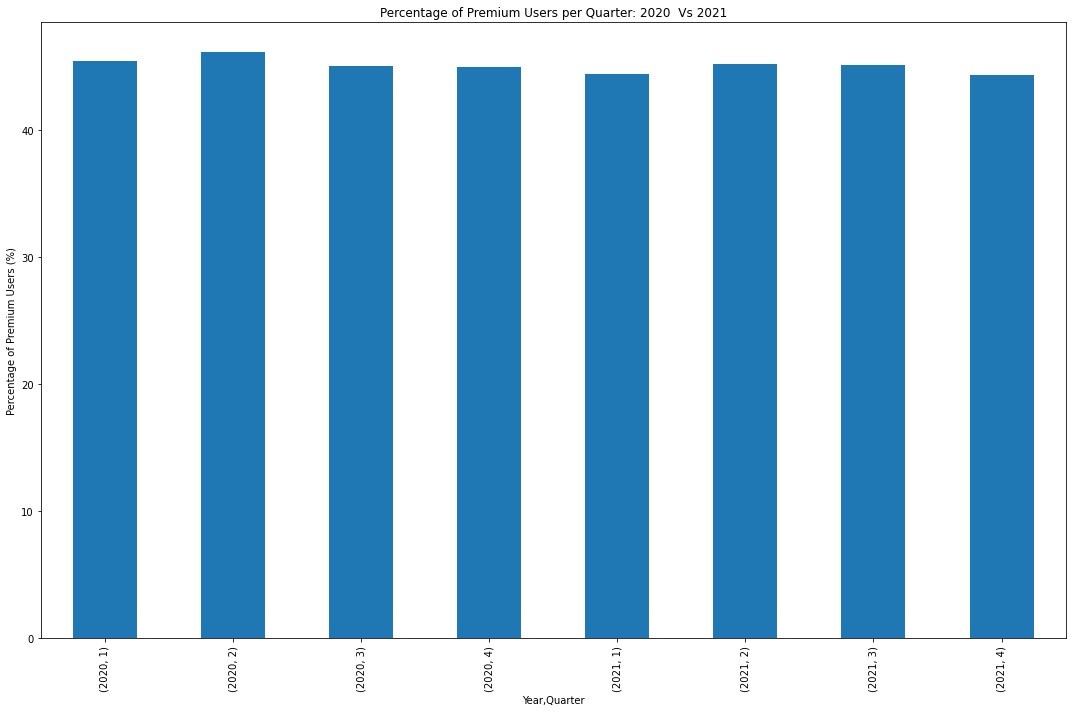

In [99]:
#% changes of 1st quarter 2020 - last quarter 2021 Bar graph - ricky
new_data2.plot.bar(title = "Percentage of Premium Users per Quarter: 2020  Vs 2021", ylabel = "Percentage of Premium Users (%)", legend = False)
plt.savefig("Figures/Premium_20.png")

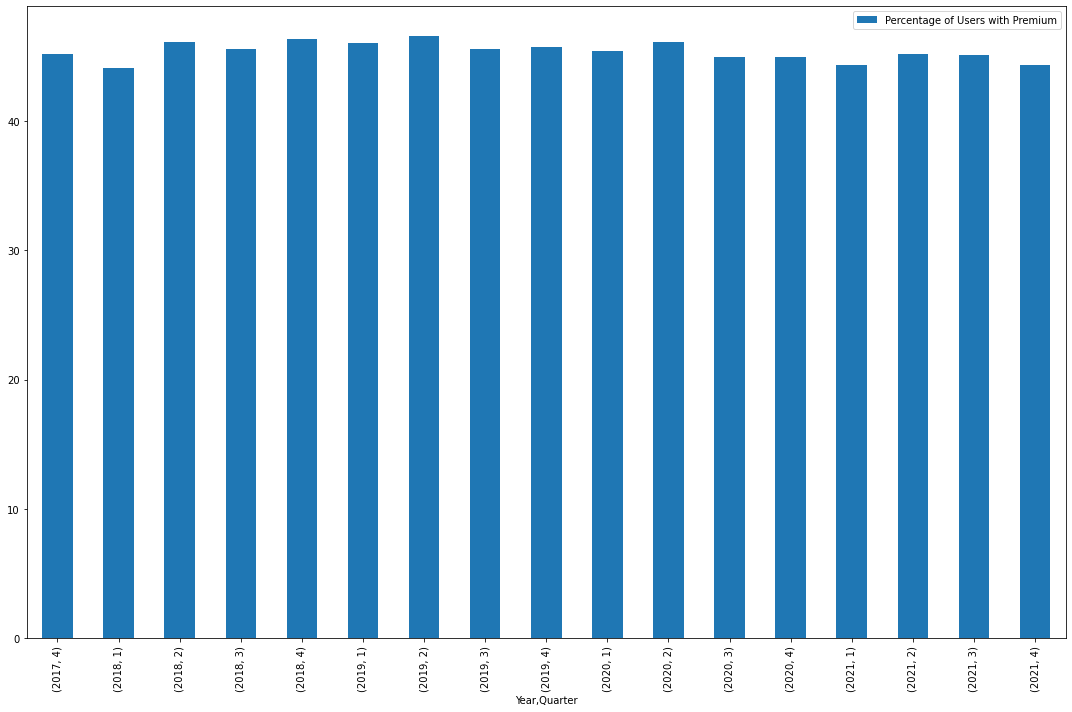

In [110]:
#Difference Between 2018-2019 data & 2020-2021 data bar graph  - ricky
change_data2 = change_data2.set_index(["Year", "Quarter"])
change_data2.plot.bar()
plt.savefig("Figures/premium_total.png")

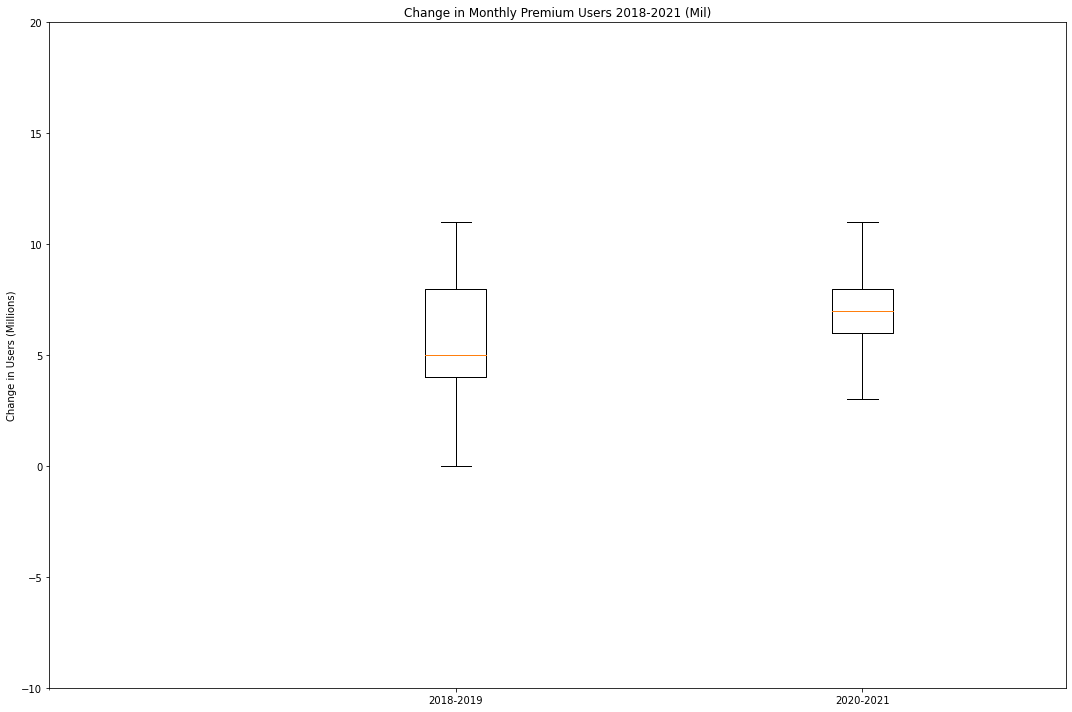

For 2018-2019:
The average monthly change of users is: 5.9
The lower quartile of change in users is: 4.0
The upper quartile of change in users is: 8.0
The interquartile range of change in users is: 4.0
The the median of change in users is: 5.0 
Values below -2.0 could be outliers.
Values above 14.0 could be outliers.
-------------------
For 2020-2021:
The average monthly change of users is: 7.0
The lower quartile of change in users is: 6.0
The upper quartile of change in users is: 8.0
The interquartile range of change in users is: 2.0
The the median of change in users is: 7.0 
Values below 3.0 could be outliers.
Values above 11.0 could be outliers.


<Figure size 1080x720 with 0 Axes>

In [111]:
#Difference Between 2018-2019 data & 2020-2021 data Box plot /t test pvlaue - Aaron
# Split the data into two arrays, 2018-2019 and 2020-2021.  This represents pre- and post-Covid data.
# Using the column indicating the change in number of premium users between quarters we can best see the direct impact
# of Covid on the subscribed user population.
df_1 = spotdf.iloc[:9,:]
df_2 = spotdf.iloc[9:,:]
premchg1 = df_1["Premium Users change(mil)"]
premchg2 = df_2["Premium Users change(mil)"]
fig1, ax1 = plt.subplots()
ax1.set_title('Change in Monthly Premium Users 2018-2021 (Mil)')
ax1.set_ylabel('Change in Users (Millions)')
ax1.boxplot([premchg1, premchg2])
plt.ylim((-10,20))
labels = ['2018-2019', '2020-2021']
x = np.arange(len(labels))
ax1.set_xticks(x, minor=True);ax1.set_xticklabels(labels)
plt.show()

# Below we show other data regarding the quarterly change in premium subscribers.

print("For 2018-2019:")
quartiles1 = premchg1.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
avgchg1 = round(df_1["Premium Users change(mil)"].mean(),1)
print(f"The average monthly change of users is: {avgchg1}")
print(f"The lower quartile of change in users is: {lowerq1}")
print(f"The upper quartile of change in users is: {upperq1}")
print(f"The interquartile range of change in users is: {iqr1}")
print(f"The the median of change in users is: {quartiles1[0.5]} ")
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

print("-------------------")
print("For 2020-2021:")
quartiles2 = premchg2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
avgchg2 = round(df_2["Premium Users change(mil)"].mean(),1)
print(f"The average monthly change of users is: {avgchg2}")
print(f"The lower quartile of change in users is: {lowerq2}")
print(f"The upper quartile of change in users is: {upperq2}")
print(f"The interquartile range of change in users is: {iqr2}")
print(f"The the median of change in users is: {quartiles2[0.5]} ")
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")
plt.savefig("Figures/boxplot.png")

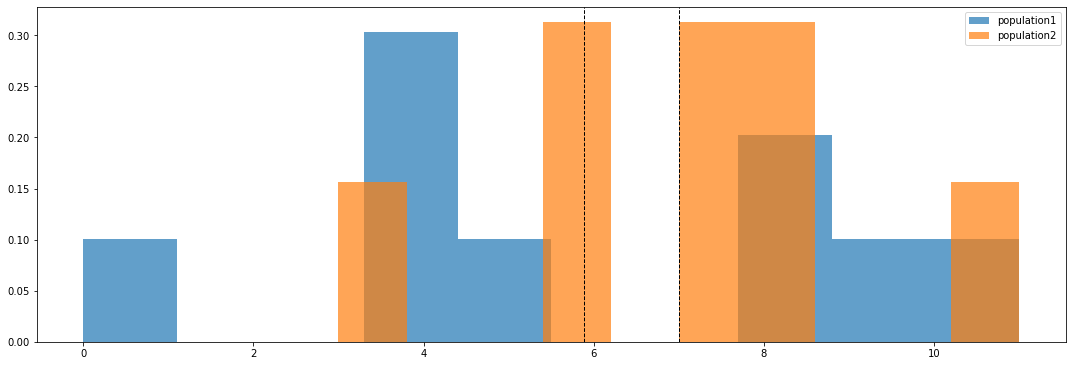

In [112]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(premchg1, 10, density=True, alpha=0.7, label="population1")
plt.hist(premchg2, 10, density=True, alpha=0.7, label="population2")
plt.axvline(premchg1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(premchg2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.savefig("Figures/histogram.png")


In [113]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(premchg1, premchg2, equal_var=False)

Ttest_indResult(statistic=-0.8049833219245712, pvalue=0.43423473280824654)

<function matplotlib.pyplot.show(close=None, block=None)>

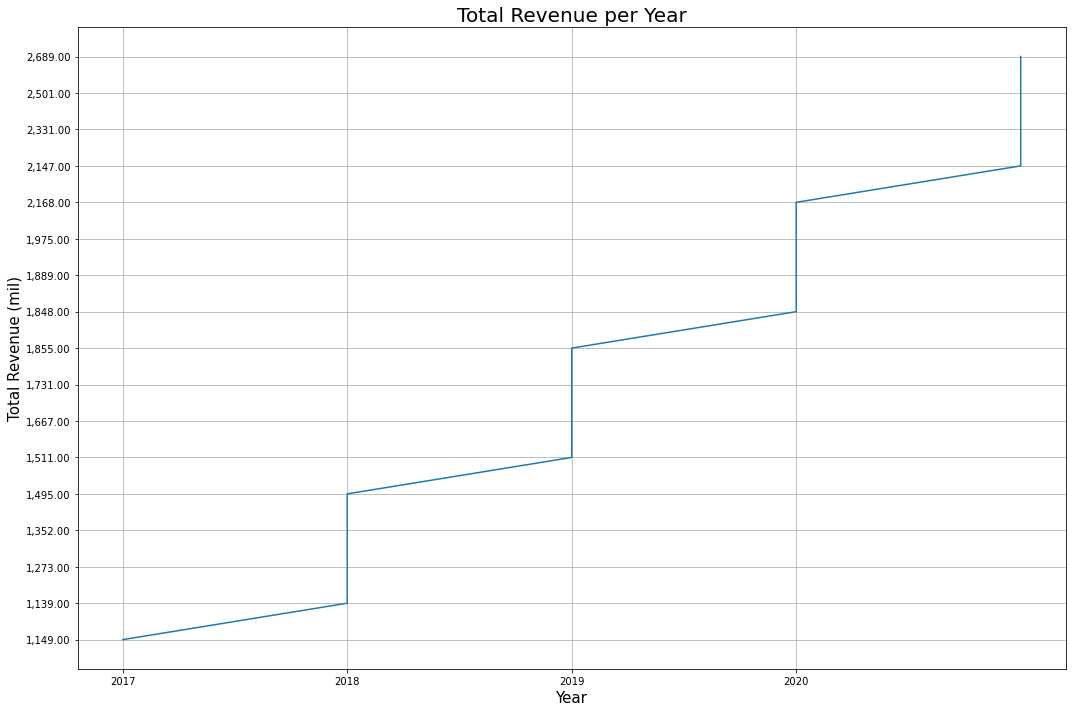

In [114]:
#Bar Graph for revenue change per year 2018-2021 line graph - lizz
plt.plot(spotify_data_df["Year"],spotify_data_df["Total Revenue (mil)"])
plt.xticks([2017,2018,2019,2020])
plt.yticks()
plt.grid()
plt.title("Total Revenue per Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total Revenue (mil)", fontsize=15)
plt.savefig("Figures/Revenue_per_Year.png")
plt.show

In [115]:
# Copy DF to creat new df
quarterly_rev = spotify_data_df.copy(deep=True)
quarterly_rev

,Ad-Supported MAU (mil),Ad-Supported MAU change (mil),Premium Users (mil),Premium Users change(mil),Total Monthly Active Users (mil),Total Monthly Active Users change(mil),Total Revenue (mil),Total Revenue Q. Change (mil),Year,Quarter
0,90,0,71,0,157,0,"1,149.00",0,2017,4
1,99,9,75,4,170,13,"1,139.00",-10,2018,1
2,101,2,83,8,180,10,"1,273.00",134,2018,2
3,109,8,87,4,191,11,"1,352.00",79,2018,3
4,116,7,96,9,207,16,"1,495.00",143,2018,4
5,123,7,100,4,217,10,"1,511.00",16,2019,1
6,129,6,108,8,232,15,"1,667.00",156,2019,2
7,141,12,113,5,248,16,"1,731.00",64,2019,3
8,153,12,124,11,271,23,"1,855.00",124,2019,4
9,163,10,130,6,286,15,"1,848.00",-7,2020,1


In [116]:
#only show Total Revenue Year and Quarter
quarterly_rev.drop(["Ad-Supported MAU (mil)",
             "Ad-Supported MAU change (mil)",
             "Premium Users (mil)",
             "Premium Users change(mil)",
             "Total Monthly Active Users (mil)",
             "Total Monthly Active Users change(mil)",
             "Total Revenue Q. Change (mil)"], axis=1, inplace=True)
quarterly_rev

,Total Revenue (mil),Year,Quarter
0,"1,149.00",2017,4
1,"1,139.00",2018,1
2,"1,273.00",2018,2
3,"1,352.00",2018,3
4,"1,495.00",2018,4
5,"1,511.00",2019,1
6,"1,667.00",2019,2
7,"1,731.00",2019,3
8,"1,855.00",2019,4
9,"1,848.00",2020,1


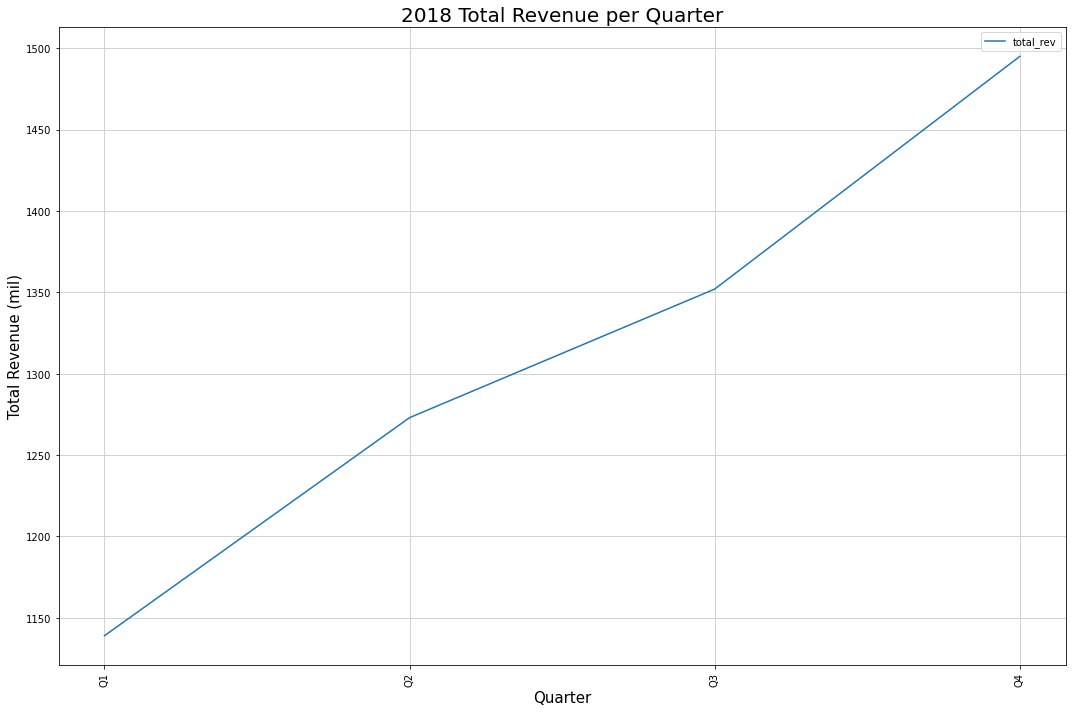

In [117]:
#Bar Graph for revenue change per quarter 2018 line graph -lizz
#Make DF for Quarters in 2018
#Line Graph for revenue change per quarter 2018 line graph -lizz
#Make DF for Quarters in 2018
yr18_df = pd.DataFrame(dict(
    quarter = ["Q1", "Q2", "Q3", "Q4"],
    total_rev = [1139.00, 1273.00, 1352.00, 1495.00]))
plt = yr18_df.plot()
plt.set_xticks(yr18_df.index)
plt.set_xticklabels(["Q1", "Q2", "Q3", "Q4"], rotation=90)
plt.set_xlabel("Quarter", fontsize=15)
plt.set_ylabel("Total Revenue (mil)", fontsize=15)
plt.set_title("2018 Total Revenue per Quarter", fontsize=20)
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.figure.savefig("Figures/2018_rev.png")

This graph shows the breakdown of the revenue by quarter as we saw in the last graph 2018 started off with a dip in revenue but slowly started making up by the 2nd quarter and a continual increase resulting in a total increase in revenue of 356M.

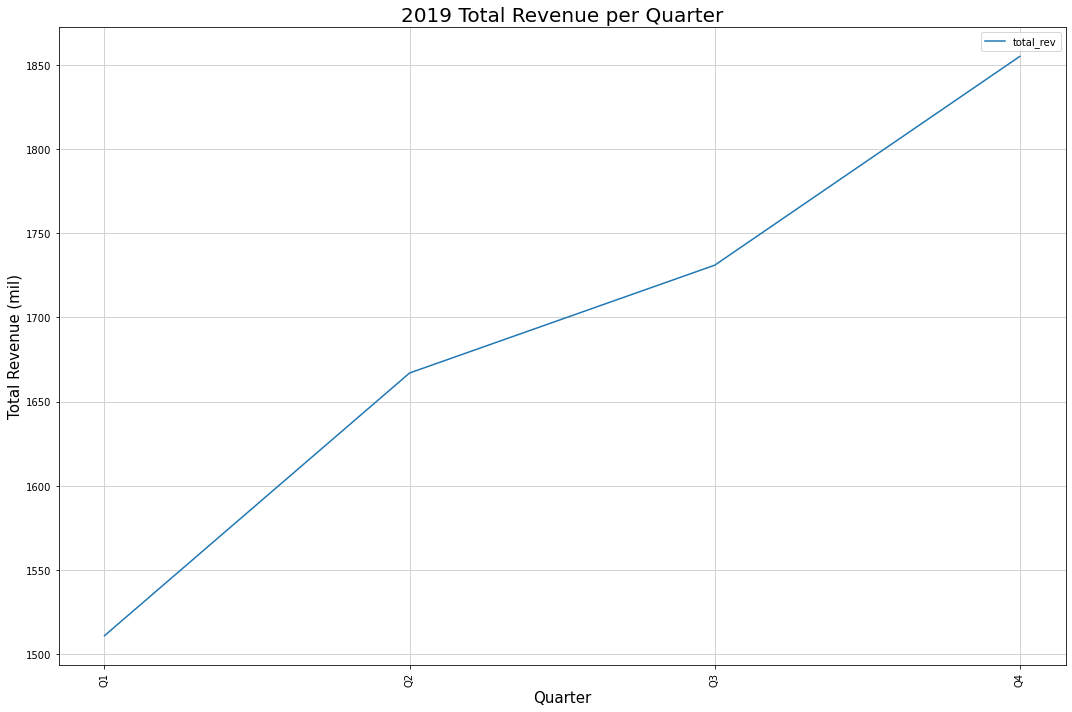

In [118]:
#Bar Graph for revenue change per quarter 2019 line graph -lizz
#Make DF for Quarters in 2019
yr19_df = pd.DataFrame(dict(
    quarter = ["Q1", "Q2", "Q3", "Q4"],
    total_rev = [1511.00, 1667.00, 1731.00, 1855.00]))
plt = yr19_df.plot()
plt.set_xticks(yr19_df.index)
plt.set_xticklabels(["Q1", "Q2", "Q3", "Q4"], rotation=90)
plt.set_xlabel("Quarter", fontsize=15)
plt.set_ylabel("Total Revenue (mil)", fontsize=15)
plt.set_title("2019 Total Revenue per Quarter", fontsize=20)
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.figure.savefig("Figures/2019_rev.png")

This graph shows the breakdown of the revenue by quarter as we saw in the last graph 2019 started off with the same momentum as 2018 resulting in an revenue increase of 156M between the 1st and 2nd quarter. The momentum slowed down with an increase of 64M between the 2nd and 3rd quarter.The total increase in revenue from 2018-2019 was 344M.

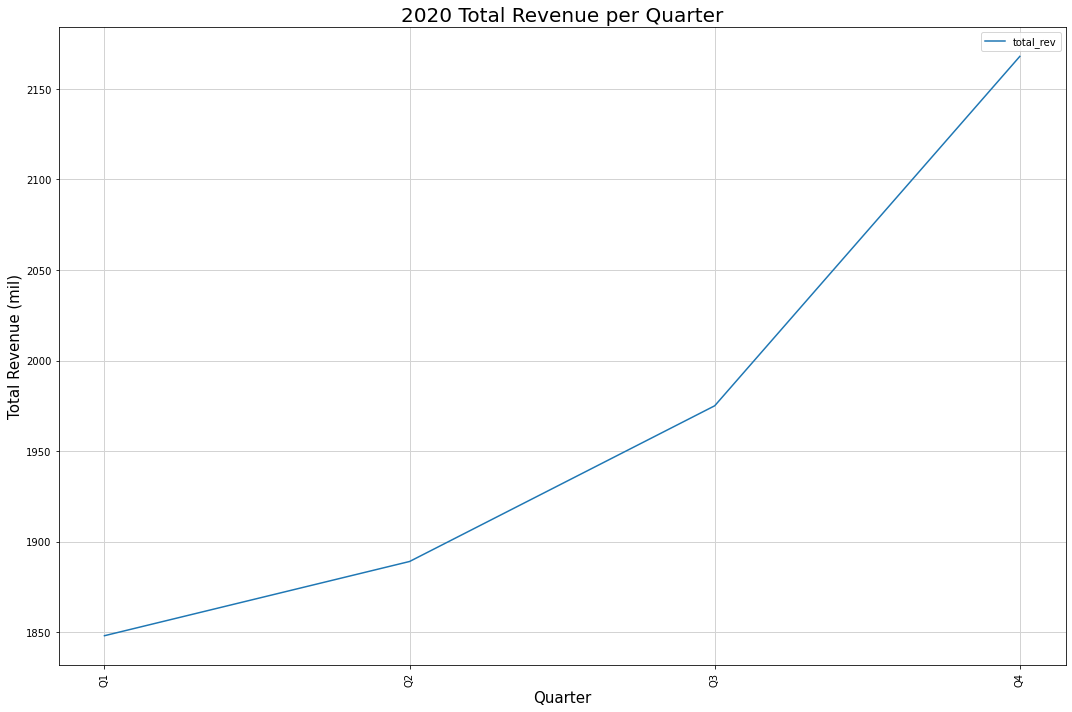

In [119]:
#Bar Graph for revenue change per quarter 2020 line graph - lizz
#Make DF for Quarters in 2020
yr20_df = pd.DataFrame(dict(
    quarter = ["Q1", "Q2", "Q3", "Q4"],
    total_rev = [1848.00, 1889.00, 1975.00, 2168.00]))
plt = yr20_df.plot()
plt.set_xticks(yr20_df.index)
plt.set_xticklabels(["Q1", "Q2", "Q3", "Q4"], rotation=90)
plt.set_xlabel("Quarter", fontsize=15)
plt.set_ylabel("Total Revenue (mil)", fontsize=15)
plt.set_title("2020 Total Revenue per Quarter", fontsize=20)
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.figure.savefig("Figures/2020_rev.png")


In this graph what is not noticeable in this graph is between 4th quarter of 2019 and the 1st quarter of 2020 there was a slight loss in revenue of 7M. However, by the 2nd quarter the revenue doubled between each quarter showing a total increase in revenue for the year 2020 of 320M. 

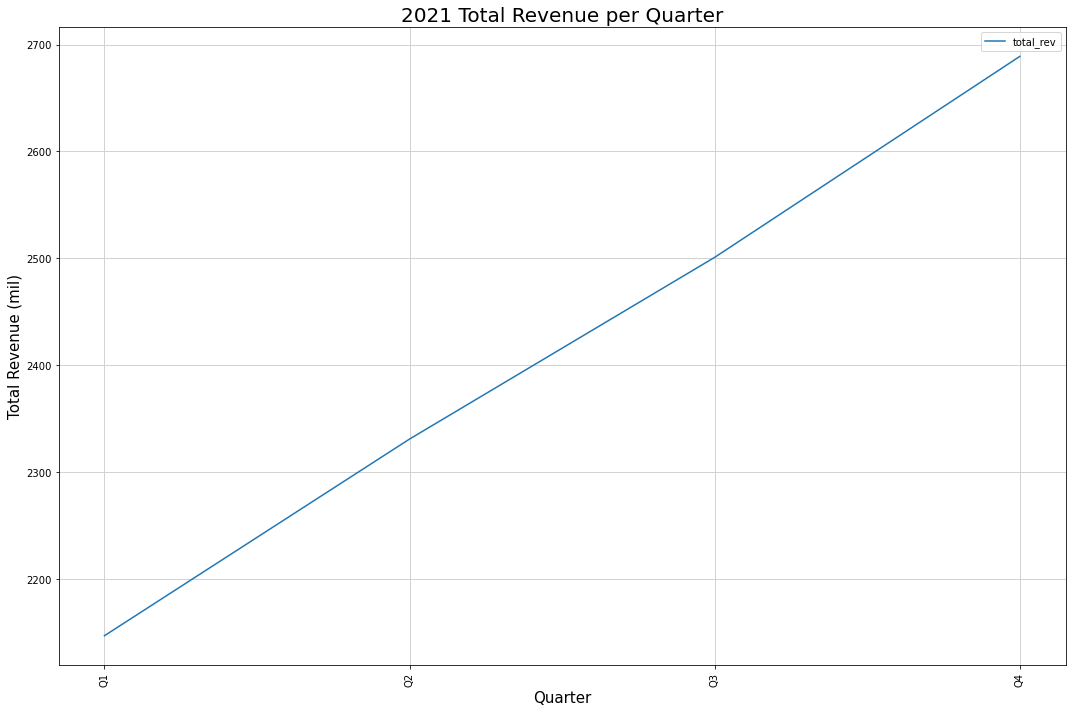

In [120]:
#Bar Graph for revenue change per quarter 2021 line graph - lizz
#Make DF for Quarters in 2021
yr21_df = pd.DataFrame(dict(
    quarter = ["Q1", "Q2", "Q3", "Q4"],
    total_rev = [2147.00, 2331.00, 2501.00, 2689.00]))
plt = yr21_df.plot()
plt.set_xticks(yr21_df.index)
plt.set_xticklabels(["Q1", "Q2", "Q3", "Q4"], rotation=90)
plt.set_xlabel("Quarter", fontsize=15)
plt.set_ylabel("Total Revenue (mil)", fontsize=15)
plt.set_title("2021 Total Revenue per Quarter", fontsize=20)
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.figure.savefig("Figures/2021_rev.png")

Just like 2020 and 2018 there was a dip in revenue between the end of 2020's 4th quarter and the end of the 1st quarter for 2021, there was another dip in revenue of 21M. After that 2021 goes on to prove Spotify's most lucrative year to date with a quick and steady increase in revenue, finishing with the highest revenue increase to-date of 542M for the year. 